## Preprocessing

In [1]:
# Import libraries for data analysis
import numpy as np 
import pandas as pd 
import pandas_profiling as pp
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from IPython.display import display,HTML
from sklearn import ensemble
from sklearn.model_selection import ShuffleSplit
from sklearn.linear_model import LogisticRegression
from sklearn import metrics as mt
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import SGDClassifier
import warnings
warnings.simplefilter('ignore')

from sklearn.ensemble import RandomForestClassifier

# show all columns
pd.set_option('display.max_columns', None) 

#Set the seaborn plotting style
sns.set(style="darkgrid")

In [20]:
#Read in the train/test files that have been created from the prior projects. This is an 80/20 split
train_file = 'train.csv'
test_file = 'test.csv'
test_filepath_BC = '/home/jbcroom/'
train_filepath_BC = '/home/jbcroom/'
test_filepath_BC2 = 'C:/RAI/'
train_filepath_BC2 = 'C:/RAI/'

test_filepath_AR = 'C:/Users/Allison/JupyterNotebook/Data/Train_Test_Files/'
train_filepath_AR = 'C:/Users/Allison/JupyterNotebook/Data/Train_Test_Files/'

test_filepath_JB = ''
train_filepath_JB = ''

test_filepath_SO = ''
train_filepath_SO = ''

df_test_in = pd.read_csv(test_filepath_AR + test_file)
df_train_in = pd.read_csv(train_filepath_AR + train_file)

df_test = df_test_in[df_test_in["ST_TX"]==1]
df_train = df_train_in[df_train_in["ST_TX"]==1]

df_train.head()

,Unnamed: 0,Severity,Start_Lat,Start_Lng,Distance(mi),Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in),PointOfInterest,Bump,Crossing,Yield,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Start_Hour,Time_Duration(min),State,Timezone,Start_Time,Weather_Condition,SM_Interim,Side_,Side_L,Side_R,Sunrise_Sunset_Day,Sunrise_Sunset_Night,Start_Weekday_Fri,Start_Weekday_Mon,Start_Weekday_Sat,Start_Weekday_Sun,Start_Weekday_Thu,Start_Weekday_Tue,Start_Weekday_Wed,Start_Month_Apr,Start_Month_Aug,Start_Month_Dec,Start_Month_Feb,Start_Month_Jan,Start_Month_Jul,Start_Month_Jun,Start_Month_Mar,Start_Month_May,Start_Month_Nov,Start_Month_Oct,Start_Month_Sep,ST_AL,ST_AR,ST_AZ,ST_CA,ST_CO,ST_CT,ST_DC,ST_DE,ST_FL,ST_GA,ST_IA,ST_ID,ST_IL,ST_IN,ST_KS,ST_KY,ST_LA,ST_MA,ST_MD,ST_ME,ST_MI,ST_MN,ST_MO,ST_MS,ST_MT,ST_NC,ST_ND,ST_NE,ST_NH,ST_NJ,ST_NM,ST_NV,ST_NY,ST_OH,ST_OK,ST_OR,ST_PA,ST_RI,ST_SC,ST_SD,ST_TN,ST_TX,ST_UT,ST_VA,ST_VT,ST_WA,ST_WI,ST_WV,ST_WY,Weather_Condition_Collapsed_Ash,Weather_Condition_Collapsed_Clear,Weather_Condition_Collapsed_Clear/Windy,Weather_Condition_Collapsed_Cloudy,Weather_Condition_Collapsed_Cloudy/Windy,Weather_Condition_Collapsed_Dust,Weather_Condition_Collapsed_Dust/Windy,Weather_Condition_Collapsed_Fog,Weather_Condition_Collapsed_Fog/Windy,Weather_Condition_Collapsed_Icy,Weather_Condition_Collapsed_Icy/Snow,Weather_Condition_Collapsed_Icy/Windy,Weather_Condition_Collapsed_Rain,Weather_Condition_Collapsed_Rain/Snow,Weather_Condition_Collapsed_Rain/Windy,Weather_Condition_Collapsed_Rainy,Weather_Condition_Collapsed_Sand,Weather_Condition_Collapsed_Sand/Windy,Weather_Condition_Collapsed_Smoke,Weather_Condition_Collapsed_Smoke/Windy,Weather_Condition_Collapsed_Snow,Weather_Condition_Collapsed_Snow/Windy,Weather_Condition_Collapsed_Snowy,Weather_Condition_Collapsed_Tornado,TMC_200.0,TMC_201.0,TMC_202.0,TMC_203.0,TMC_206.0,TMC_222.0,TMC_229.0,TMC_236.0,TMC_239.0,TMC_241.0,TMC_244.0,TMC_245.0,TMC_246.0,TMC_247.0,TMC_248.0,TMC_336.0,TMC_339.0,TMC_341.0,TMC_343.0,TMC_351.0,TMC_406.0
32408,32408,0.0,32.860638,-96.719559,0.0,90.0,93.0,57.0,29.77,10.0,10.4,0.01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,20.0,62.0,TX,US/Central,2016-06-14 20:06:43,Partly Cloudy,Jun,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
32416,32416,0.0,30.335411,-97.703049,0.0,89.1,93.0,61.0,29.80,10.0,5.8,0.01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,20.0,51.0,TX,US/Central,2016-06-14 20:17:03,Clear,Jun,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
32423,32423,0.0,29.757492,-95.365791,0.0,86.0,93.0,66.0,29.84,8.0,9.2,0.01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,20.0,46.0,TX,US/Central,2016-06-14 20:21:49,Clear,Jun,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
32431,32431,0.0,29.821486,-95.368080,0.0,84.2,93.0,70.0,29.84,8.0,9.2,0.01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,20.0,46.0,TX,US/Central,2016-06-14 20:26:55,Clear,Jun,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
32460,32460,0.0,32.871536,-96.683105,0.0,88.0,93.0,61.0,29.78,10.0,8.1,0.01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,20.0,30.0,TX,US/Central,2016-06-14 20:49:39,Scattered Clouds,Jun,0,1,0,0,1,0,

In [23]:
# Get validation set off of last 20% of train data
df_train=df_train.sort_values("Start_Time")
train_size = int(len(df_train) * 0.8)

X_train, X_val = df_train[0:train_size], df_train[train_size:len(df_train)]

y = df_train['Severity']
y_train, y_val = y[0:train_size], y[train_size:len(y)]

#Build training/validation set for severity
df_X_train = X_train.copy()
df_X_test = X_val.copy()

df_Y_train = y_train.copy()
df_Y_test = y_val.copy()

#list columns to remove:
removeList = {'Severity', 'Weather_Condition','SM_Interim','State','Timezone','Start_Time','Unnamed: 0', 'TMC_200.0',
              'TMC_201.0','TMC_202.0','TMC_203.0',
              'TMC_206.0','TMC_222.0','TMC_229.0',
              'TMC_236.0','TMC_239.0','TMC_241.0',
              'TMC_244.0','TMC_245.0','TMC_246.0',
              'TMC_247.0','TMC_248.0','TMC_336.0',
              'TMC_339.0','TMC_341.0','TMC_343.0',
              'TMC_351.0','TMC_406.0','ST_AL','ST_AR','ST_AZ','ST_CA','ST_CO','ST_CT','ST_DC','ST_DE',
              'ST_FL','ST_GA','ST_IA','ST_ID','ST_IL','ST_IN','ST_KS','ST_KY','ST_LA','ST_MA','ST_MD',
              'ST_ME','ST_MI','ST_MN','ST_MO','ST_MS','ST_MT','ST_NC','ST_ND','ST_NE','ST_NH','ST_NJ',
              'ST_NM','ST_NV','ST_NY','ST_OH','ST_OK','ST_OR','ST_PA','ST_RI','ST_SC','ST_SD','ST_TN',
              'ST_TX','ST_UT','ST_VA','ST_VT','ST_WA','ST_WI','ST_WV','ST_WY'} 

df_X_train.drop(removeList,1,inplace=True)
df_X_test.drop(removeList,1,inplace=True)

In [56]:
#update
df_test_fin_in = pd.read_csv(test_filepath_AR + test_file)
df_test_fin = df_test_fin_in[df_test_fin_in["ST_TX"]==1]
df_Y_test_fin = df_test_fin['Severity']
df_X_test_fin = df_test_fin.copy()
df_X_test_fin.drop(removeList,1,inplace=True)

X_test_fin = df_X_test_fin.to_numpy()
Y_test_fin = df_Y_test_fin.to_numpy()

In [25]:
df_X_train.head()

,Start_Lat,Start_Lng,Distance(mi),Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in),PointOfInterest,Bump,Crossing,Yield,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Start_Hour,Time_Duration(min),Side_,Side_L,Side_R,Sunrise_Sunset_Day,Sunrise_Sunset_Night,Start_Weekday_Fri,Start_Weekday_Mon,Start_Weekday_Sat,Start_Weekday_Sun,Start_Weekday_Thu,Start_Weekday_Tue,Start_Weekday_Wed,Start_Month_Apr,Start_Month_Aug,Start_Month_Dec,Start_Month_Feb,Start_Month_Jan,Start_Month_Jul,Start_Month_Jun,Start_Month_Mar,Start_Month_May,Start_Month_Nov,Start_Month_Oct,Start_Month_Sep,Weather_Condition_Collapsed_Ash,Weather_Condition_Collapsed_Clear,Weather_Condition_Collapsed_Clear/Windy,Weather_Condition_Collapsed_Cloudy,Weather_Condition_Collapsed_Cloudy/Windy,Weather_Condition_Collapsed_Dust,Weather_Condition_Collapsed_Dust/Windy,Weather_Condition_Collapsed_Fog,Weather_Condition_Collapsed_Fog/Windy,Weather_Condition_Collapsed_Icy,Weather_Condition_Collapsed_Icy/Snow,Weather_Condition_Collapsed_Icy/Windy,Weather_Condition_Collapsed_Rain,Weather_Condition_Collapsed_Rain/Snow,Weather_Condition_Collapsed_Rain/Windy,Weather_Condition_Collapsed_Rainy,Weather_Condition_Collapsed_Sand,Weather_Condition_Collapsed_Sand/Windy,Weather_Condition_Collapsed_Smoke,Weather_Condition_Collapsed_Smoke/Windy,Weather_Condition_Collapsed_Snow,Weather_Condition_Collapsed_Snow/Windy,Weather_Condition_Collapsed_Snowy,Weather_Condition_Collapsed_Tornado
32408,32.860638,-96.719559,0.0,90.0,93.0,57.0,29.77,10.0,10.4,0.01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,20.0,62.0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
32416,30.335411,-97.703049,0.0,89.1,93.0,61.0,29.80,10.0,5.8,0.01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,20.0,51.0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
32423,29.757492,-95.365791,0.0,86.0,93.0,66.0,29.84,8.0,9.2,0.01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,20.0,46.0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
32431,29.821486,-95.368080,0.0,84.2,93.0,70.0,29.84,8.0,9.2,0.01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,20.0,46.0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
32460,32.871536,-96.683105,0.0,88.0,93.0,61.0,29.78,10.0,8.1,0.01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,20.0,30.0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [26]:
df_train['Severity'].value_counts(normalize=True) 

0.0    0.752022
1.0    0.247978
Name: Severity, dtype: float64

In [27]:
X_train['Severity'].value_counts(normalize=True )

0.0    0.749633
1.0    0.250367
Name: Severity, dtype: float64

In [28]:
X_val['Severity'].value_counts(normalize=True)

0.0    0.761577
1.0    0.238423
Name: Severity, dtype: float64

In [29]:
#Convert dataframes to numpy arrays

X_train = df_X_train.to_numpy()
X_test = df_X_test.to_numpy()

Y_train = df_Y_train.to_numpy()
Y_test = df_Y_test.to_numpy()

print("X-train: ",X_train.shape)
print("X-test: ",X_test.shape)
print("Y-train: ",Y_train.shape)
print("Y-test: ",Y_test.shape)

X-train:  (163692, 73)
X-test:  (40923, 73)
Y-train:  (163692,)
Y-test:  (40923,)


In [31]:
def multiclass_log_loss(y_true, y_pred, eps=1e-15):
    """Multi class version of Logarithmic Loss metric.
    https://www.kaggle.com/wiki/MultiClassLogLoss

    Parameters
    ----------
    y_true : array, shape = [n_samples]
            true class, integers in [0, n_classes - 1)
    y_pred : array, shape = [n_samples, n_classes]

    Returns
    -------
    loss : float
    """
    predictions = np.clip(y_pred, eps, 1 - eps)

    # normalize row sums to 1
    predictions /= predictions.sum(axis=1)[:, np.newaxis]

    actual = np.zeros(y_pred.shape)
    n_samples = actual.shape[0]
    actual[np.arange(n_samples), y_true.astype(int)] = 1
    vectsum = np.sum(actual * np.log(predictions))
    loss = -1.0 / n_samples * vectsum
    return loss

In [64]:
scl_obj = StandardScaler()
scl_obj.fit(X_train) # find scalings for each column that make this zero mean and unit std

X_train_scaled = scl_obj.transform(X_train) # apply to training
X_test_scaled = scl_obj.transform(X_test) # apply those means and std to the test set 
X_test_fin_scaled = scl_obj.transform(X_test_fin) #update

## Decision Tree
The next model we used to classify low and high severity accidents was a single decision tree. As we have shown, approximately 75 of accidents in our training data are low severity accidents, while the remaining 25% are high severity. Because of this, we sought to tune the hyperparameters to optimize recall, the ratio of correctly predicted high severity accidents to both correctly and incorrectly predicted high severity accidents. This metric is suited to our data because we are highly motivated to identify high severity accidents in order to better allocate first responders and their resources for those accidents. We will also be looking at accuracy, which is the rate of correctly identifying severity, to get an overall feel for how well our model predicts high and low severity.

### Parameter Tuning
Before fitting the actual model, we will tune the parameters to optimize recall and accuracy and prevent overfitting. Below, we look at how the depth of the tree, the number of parameters required to split an internal node, and the number of features allowed in the model. Restricting all of these values may help prevent a tree that fits well on the train dataset, but not on the validation set.

#### Max Depth
We can see from the graph below that as the tree gets deeper, there is a growing division between the models' recall for the training and validation set. Even though the recall is high for those deeper-tree models, we do not see much change in recall beyond a max depth of 16. However, we recommend to set a max depth of 13 in order to guard against overfitting.

#### Min Sample Size
After adjusting the sample size from the minimum value of 2 to 1,600 (approximately 1% of the training data). We see declining recall as the min sample size grows; however, paired with that, we see the training and validation model recalls growing closer. Therefore, we will chose a min sample size of around 500 to strike a balance between high recall and low model variability.

#### Max Features
Iterating over the max number of features from 5 to 73, the total number of features available, we see a steadily growing recall on the validation set. In order not to lose any potentially useful information, we will leave the default value of 73 for the max features.

In [33]:
from sklearn.tree import DecisionTreeClassifier
import math

In [55]:
# We will try iterating over depths from 2 to 74
max_depths = np.arange(2,50,step=2)

acc_results=[]
prec_results=[]
rec_results=[]
ll_results=[]

train_acc_results=[]
train_prec_results=[]
train_rec_results=[]
train_ll_results=[]

for max_depth in max_depths:
    dt_clf = DecisionTreeClassifier(criterion='gini', max_depth=max_depth, 
                                min_samples_split=2, min_samples_leaf=1, 
                                max_features=None,
                                max_leaf_nodes=None,
                               random_state=123)
    dt_clf.fit(X_train_scaled, Y_train)
    
    train_yhat = dt_clf.predict(X_train_scaled)
    train_class_prob = dt_clf.predict_proba(X_train_scaled)
    
    yhat = dt_clf.predict(X_test_scaled)
    class_probabilities = dt_clf.predict_proba(X_test_scaled)
    
    train_acc = mt.accuracy_score(Y_train, train_yhat)
    train_prec = mt.precision_score(Y_train, train_yhat)
    train_rec = mt.recall_score(Y_train, train_yhat)
    train_ll = multiclass_log_loss(Y_train, train_class_prob)
    
    acc = mt.accuracy_score(Y_test, yhat)
    prec = mt.precision_score(Y_test, yhat)
    rec = mt.recall_score(Y_test, yhat)
    ll = multiclass_log_loss(Y_test, class_probabilities)
#     depth=rf.get_depth()
    
    train_acc_results.append(train_acc)
    train_prec_results.append(train_prec)
    train_rec_results.append(train_rec)
    train_ll_results.append(train_ll)
    
    acc_results.append(acc)
    prec_results.append(prec)
    rec_results.append(rec)
    ll_results.append(ll)
#     depth_results.append(depth)
    
    
    print ('Max depth:', max_depth)
    print ('TRAIN')
    print (' Accuracy:', train_acc)
    print (' Precision:', train_prec)
    print (' Recall:', train_rec)
    print (' Log Loss:', train_ll)
    print ('VALIDATION')
    print (' Accuracy:', acc)
    print (' Precision:', prec)
    print (' Recall:', rec)
    print (' Log Loss:', ll)
    print ("---")

Max depth: 2
TRAIN
 Accuracy: 0.7496334579576277
 Precision: 0.0
 Recall: 0.0
 Log Loss: 0.49967487297755153
VALIDATION
 Accuracy: 0.7615766195049238
 Precision: 0.0
 Recall: 0.0
 Log Loss: 0.48662327224148383
---
Max depth: 4
TRAIN
 Accuracy: 0.7729455318525035
 Precision: 0.5522339027595269
 Recall: 0.4922040846204524
 Log Loss: 0.46380586869347995
VALIDATION
 Accuracy: 0.789336070180583
 Precision: 0.5554146341463415
 Recall: 0.5834785282361381
 Log Loss: 0.4498102165511542
---
Max depth: 6
TRAIN
 Accuracy: 0.8007721819025976
 Precision: 0.6981677003929738
 Recall: 0.3598077251543323
 Log Loss: 0.434025565323581
VALIDATION
 Accuracy: 0.8055372284534369
 Precision: 0.6597407210087018
 Recall: 0.3807522804140617
 Log Loss: 0.4366827877487338
---
Max depth: 8
TRAIN
 Accuracy: 0.8204738166801065
 Precision: 0.6880025940337224
 Recall: 0.5177268623575629
 Log Loss: 0.3967808139094108
VALIDATION
 Accuracy: 0.8223004178579283
 Precision: 0.6505513146734521
 Recall: 0.5502715998770114
 Log 

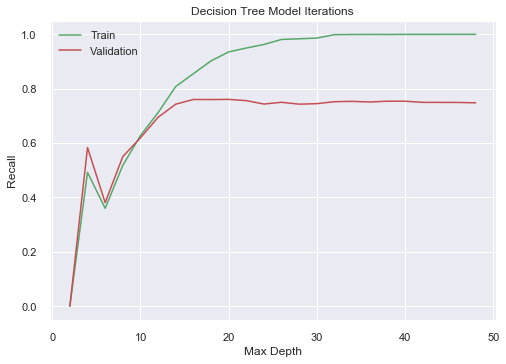

In [57]:
plt.plot(max_depths, train_rec_results, 'g', label="Train")
plt.plot(max_depths, rec_results, 'r', label="Validation")

plt.legend()

plt.ylabel("Recall")
plt.xlabel("Max Depth")
plt.title('Decision Tree Model Iterations')
plt.show()

In [41]:
.01*len(Y_train)

1636.92

In [42]:
np.arange(2,1600,step=75)

array([   2,   77,  152,  227,  302,  377,  452,  527,  602,  677,  752,
        827,  902,  977, 1052, 1127, 1202, 1277, 1352, 1427, 1502, 1577])

In [58]:
# We will try iterating over different sample splits
min_samples_splits = np.arange(2,1600,step=75)
# .01*len(Y_train) is ~1600

acc_results=[]
prec_results=[]
rec_results=[]
ll_results=[]

train_acc_results=[]
train_prec_results=[]
train_rec_results=[]
train_ll_results=[]

for min_samples_split in min_samples_splits:
    dt_clf= DecisionTreeClassifier(criterion='gini', max_depth=50, 
                                min_samples_split=min_samples_split, min_samples_leaf=1, 
                                max_features=None,
                                max_leaf_nodes=None,
                               random_state=123)
    dt_clf.fit(X_train_scaled, Y_train)
    
    train_yhat = dt_clf.predict(X_train_scaled)
    train_class_prob = dt_clf.predict_proba(X_train_scaled)
    
    yhat = dt_clf.predict(X_test_scaled)
    class_probabilities = dt_clf.predict_proba(X_test_scaled)
    
    train_acc = mt.accuracy_score(Y_train, train_yhat)
    train_prec = mt.precision_score(Y_train, train_yhat)
    train_rec = mt.recall_score(Y_train, train_yhat)
    train_ll = multiclass_log_loss(Y_train, train_class_prob)
    
    acc = mt.accuracy_score(Y_test, yhat)
    prec = mt.precision_score(Y_test, yhat)
    rec = mt.recall_score(Y_test, yhat)
    ll = multiclass_log_loss(Y_test, class_probabilities)
    
    train_acc_results.append(train_acc)
    train_prec_results.append(train_prec)
    train_rec_results.append(train_rec)
    train_ll_results.append(train_ll)
    
    acc_results.append(acc)
    prec_results.append(prec)
    rec_results.append(rec)
    ll_results.append(ll)
    
    print ('Min samples split:', min_samples_split)
    print ('TRAIN')
    print (' Accuracy:', train_acc)
    print (' Precision:', train_prec)
    print (' Recall:', train_rec)
    print (' Log Loss:', train_ll)
    print ('VALIDATION')
    print (' Accuracy:', acc)
    print (' Precision:', prec)
    print (' Recall:', rec)
    print (' Log Loss:', ll)
    print ("---")
    

Min samples split: 2
TRAIN
 Accuracy: 0.9998594922170906
 Precision: 0.9998779594825482
 Recall: 0.9995607934997438
 Log Loss: 0.00022886493590875678
VALIDATION
 Accuracy: 0.8610316936685971
 Precision: 0.6924895951570186
 Recall: 0.7503330941887876
 Log Loss: 4.797383835567414
---
Min samples split: 77
TRAIN
 Accuracy: 0.9340346504410723
 Precision: 0.8538935915773677
 Recall: 0.8885635507405509
 Log Loss: 0.14664059049913927
VALIDATION
 Accuracy: 0.8703174254086944
 Precision: 0.7082553350804942
 Recall: 0.7755457620170134
 Log Loss: 1.1824806032720239
---
Min samples split: 152
TRAIN
 Accuracy: 0.9198189282310681
 Precision: 0.8273714393155965
 Recall: 0.8589659126955079
 Log Loss: 0.17810945446435028
VALIDATION
 Accuracy: 0.8668719302103951
 Precision: 0.7004745510374988
 Recall: 0.771548631751563
 Log Loss: 0.8032079696236661
---
Min samples split: 227
TRAIN
 Accuracy: 0.9081873274197884
 Precision: 0.808506085964245
 Recall: 0.8298318815118464
 Log Loss: 0.20299345547850042
VALID

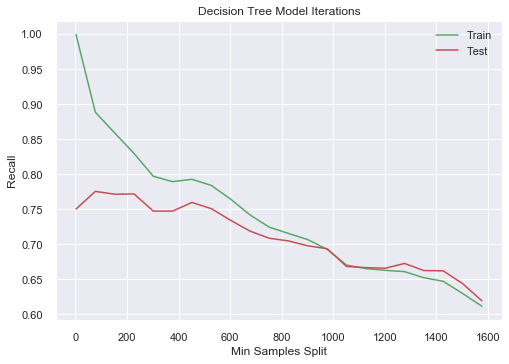

In [59]:
plt.plot(min_samples_splits, train_rec_results, 'g', label="Train")
plt.plot(min_samples_splits, rec_results, 'r', label="Test")

plt.legend()

plt.ylabel("Recall")
plt.xlabel("Min Samples Split")
plt.title('Decision Tree Model Iterations')
plt.show()

In [60]:
# We will try iterating over max amount of features used
max_features = np.ceil(np.linspace(1, 73, 10, endpoint=True)).astype(int)

acc_results=[]
prec_results=[]
rec_results=[]
ll_results=[]

train_acc_results=[]
train_prec_results=[]
train_rec_results=[]
train_ll_results=[]

for max_feat in max_features:
    dt_clf = DecisionTreeClassifier(criterion='gini', max_depth=50, 
                                min_samples_split=2, min_samples_leaf=1, 
                                max_features=max_feat,
                                max_leaf_nodes=None,
                               random_state=123)
    dt_clf.fit(X_train_scaled, Y_train)
    
    train_yhat = dt_clf.predict(X_train_scaled)
    train_class_prob = dt_clf.predict_proba(X_train_scaled)
    
    yhat = dt_clf.predict(X_test_scaled)
    class_probabilities = dt_clf.predict_proba(X_test_scaled)
    
    train_acc = mt.accuracy_score(Y_train, train_yhat)
    train_prec = mt.precision_score(Y_train, train_yhat)
    train_rec = mt.recall_score(Y_train, train_yhat)
    train_ll = multiclass_log_loss(Y_train, train_class_prob)
    
    acc = mt.accuracy_score(Y_test, yhat)
    prec = mt.precision_score(Y_test, yhat)
    rec = mt.recall_score(Y_test, yhat)
    ll = multiclass_log_loss(Y_test, class_probabilities)
    
    train_acc_results.append(train_acc)
    train_prec_results.append(train_prec)
    train_rec_results.append(train_rec)
    train_ll_results.append(train_ll)
    
    acc_results.append(acc)
    prec_results.append(prec)
    rec_results.append(rec)
    ll_results.append(ll)
    
    print ('Max features:', max_feat)
    print ('TRAIN')
    print (' Accuracy:', train_acc)
    print (' Precision:', train_prec)
    print (' Recall:', train_rec)
    print (' Log Loss:', train_ll)
    print ('VALIDATION')
    print (' Accuracy:', acc)
    print (' Precision:', prec)
    print (' Recall:', rec)
    print (' Log Loss:', ll)
    print ("---")
    

Max features: 1
TRAIN
 Accuracy: 0.9995418224470347
 Precision: 0.9997312484730027
 Recall: 0.998438376887978
 Log Loss: 0.0008798523553537274
VALIDATION
 Accuracy: 0.6933997996236835
 Precision: 0.37575703598147486
 Recall: 0.4324075023060367
 Log Loss: 10.584936401258442
---
Max features: 9
TRAIN
 Accuracy: 0.9998472741490115
 Precision: 0.9999511742590694
 Recall: 0.9994387916941171
 Log Loss: 0.0002285514422517131
VALIDATION
 Accuracy: 0.7264374557095032
 Precision: 0.43715034965034966
 Recall: 0.5125550886542994
 Log Loss: 9.446895310142402
---
Max features: 17
TRAIN
 Accuracy: 0.9998839283532488
 Precision: 0.9999511814098809
 Recall: 0.9995851938608692
 Log Loss: 0.0001741185085742833
VALIDATION
 Accuracy: 0.7966424748918701
 Precision: 0.5637041640770665
 Recall: 0.6507123091114072
 Log Loss: 7.023737025771015
---
Max features: 25
TRAIN
 Accuracy: 0.9998961464213278
 Precision: 0.9999755907049405
 Recall: 0.9996095942219945
 Log Loss: 0.0001471681712176906
VALIDATION
 Accuracy:

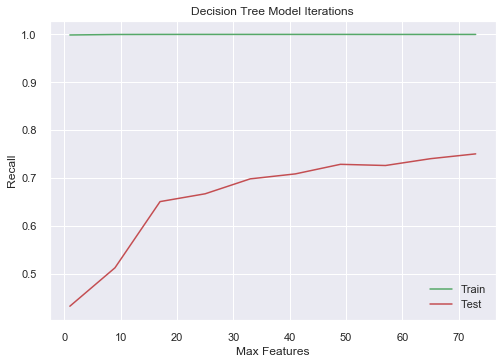

In [61]:
plt.plot(max_features, train_rec_results, 'g', label="Train")
plt.plot(max_features, rec_results, 'r', label="Test")

plt.legend()

plt.ylabel("Recall")
plt.xlabel("Max Features")
plt.title('Decision Tree Model Iterations')
plt.show()

### Decision Tree Evaluation
On the test set set aside before modeling began, we got an accuracy of 84% and a recall of 63%. In other words, this model correctly predicts 63% of high severity accidents. As shown in the confusion matrix below, we are predicting fewer true low severity accidents as high severity accidents (8.5% of all accidents) than we are predicting true high severity accidents as low accidents (7% of all accidents). Hence, our model is missing some high severity accidents that require greater resources, and it would allocate more-than-enough resources to true low severity accidents.

### Decision Tree Features
As shown in the tables below, many of the most important predictors in the model have to do with the location of the accident. The importance of features in sklearn's DecisionTreeClassifier are based on impurity reduction. 

A traffic accident taking place toward the left side of the road and near an intersection appear to have greater importance when predicting severity. Intersections include traffic signals, stop signs, junctions, and crossings. This information is important to know due to the potential pedestrian impact at these intersections as well as areas along the left side of a road. We would like to particularly minimize highly severe accidents, as interesections are apparently linked to, that could cause pedestrian harm.

Additionally, we see that the lattitude and longitude play an important role in our model. We presume these will tie to metropolitan areas of Texas that may feature more accidents.

In [93]:
dt_clf_fin = DecisionTreeClassifier(criterion='gini', max_depth=13, 
                                min_samples_split=500, min_samples_leaf=1, 
                                max_features=None,
                                max_leaf_nodes=None,
                               random_state=123)

dt_clf_fin.fit(X_train_scaled, Y_train)
yhat = dt_clf_fin.predict(X_test_fin_scaled)
class_probabilities = dt_clf_fin.predict_proba(X_test_fin_scaled)


In [94]:
acc = mt.accuracy_score(Y_test_fin, yhat)
prec = mt.precision_score(Y_test_fin, yhat)
rec = mt.recall_score(Y_test_fin, yhat)
ll = multiclass_log_loss(Y_test_fin, class_probabilities)
depth=dt_clf_fin.get_depth()
print ('Accuracy:', acc)
print ('Precision:', prec)
print ('Recall:', rec)
print ('Log Loss:', ll)
print ('Tree depth:', depth)
print ('Number of features:', dt_clf_fin.n_features_)


Accuracy: 0.8445792109947428
Precision: 0.6754226764733976
Recall: 0.6323555714541227
Log Loss: 0.3906055555971128
Tree depth: 13
Number of features: 73


In [86]:
imp_dictionary = {"Features":df_X_train.columns,"Importance":dt_clf_fin.feature_importances_}
important_features_dt=pd.DataFrame.from_dict(imp_dictionary).sort_values("Importance",ascending=False)
important_features_dt.head(10)

,Features,Importance
0,Start_Lat,0.405019
1,Start_Lng,0.266296
26,Side_L,0.114781
21,Traffic_Signal,0.113619
24,Time_Duration(min),0.045415
14,Junction,0.029220
19,Stop,0.010430
13,Yield,0.005391
12,Crossing,0.004177
2,Distance(mi),0.001515


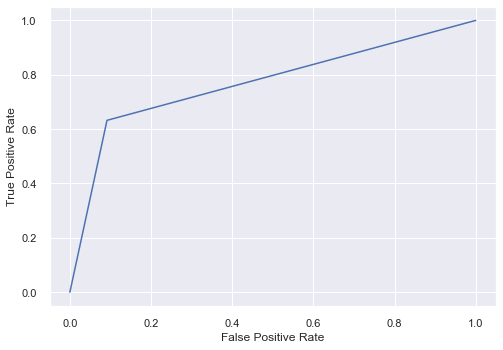

In [87]:
from matplotlib import pyplot
auc=mt.roc_auc_score(Y_test_fin,yhat)
fpd, tpr, _ = mt.roc_curve(Y_test_fin,yhat)
pyplot.plot(fpd,tpr)
pyplot.xlabel("False Positive Rate")
pyplot.ylabel("True Positive Rate")
pyplot.show()

F1 Score is  0.6531799916862963
AUC is  0.6964337280122761


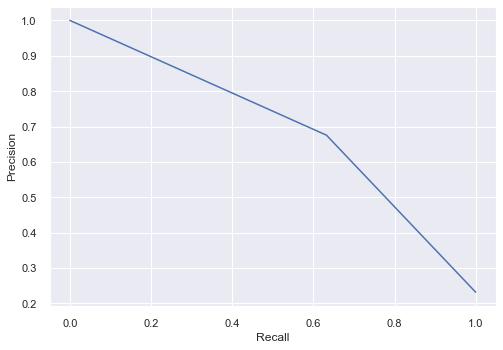

In [88]:
precision, recall, _ = mt.precision_recall_curve(Y_test_fin, yhat)
f1, auc = mt.f1_score(Y_test_fin, yhat), mt.auc(recall, precision)

print("F1 Score is ", f1)
print("AUC is ", auc)

pyplot.plot(recall, precision)
pyplot.xlabel("Recall")
pyplot.ylabel("Precision")
pyplot.show()

In [89]:
conf = mt.confusion_matrix(Y_test_fin,yhat)
conf

array([[33734,  3398],
       [ 4111,  7071]], dtype=int64)

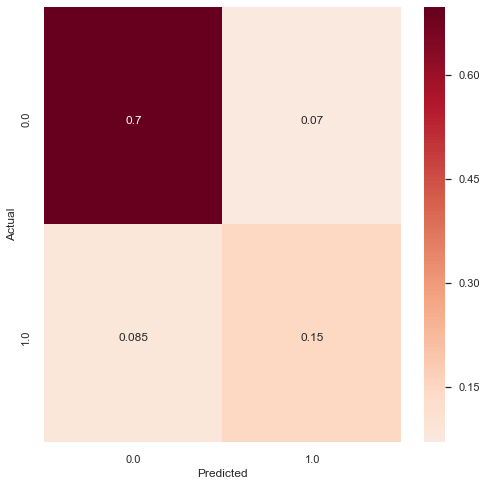

In [90]:
fig, ax = plt.subplots(figsize=(8, 8))

confusion_matrix = pd.crosstab(Y_test_fin, yhat,
                               rownames=['Actual'], colnames=['Predicted'], normalize='all')


annot_kws = {"ha": 'center',"va": 'top'}
ax = sns.heatmap(confusion_matrix, annot=True, annot_kws=annot_kws, cmap ='RdBu_r', center=0)

## Random Forest
Now we will progress from a single tree to 100 separate trees to model severity. We are hoping that with a Random Foest model, we will be able to more accuractely predict high severity accidents.

### Parameter Tuning
Before fitting the actual model, we will tune the parameters to optimize recall and accuracy and prevent overfitting. Below, we look at how the depth of the tree, the number of parameters required to split an internal node, and the number of features allowed in the model. Restricting all of these values may help prevent a tree that fits well on the train dataset, but not on the validation set.

#### Number of Trees
To utilize the benefits of RandomForestClassifier, we would like to use as many trees as possible to create the best model within computing restraints. We do not see much of a difference in recall after 25 trees. We will use 100 trees because it is incrementally better without running too slowly. Our baseline recall for this tree is 55.1%.

#### Max Features
After setting an arbitrarily deep max depth of 36, we see a steady increase in recall until a number of features around 41. We see a much higher recall on the validation set (81.3%) than we saw in our baseline 100-tree model. This is probably due to the fact that the baseline Random Forest model uses the square root of the total number of features, which would be the square root of 73 (8.5). We can see from the graph below that such a low number of features does not produce the best recall or accuracy.

#### Max Depth
We see that the validation recall levels out at a max depth of 20. In order to maximize recall, we will use that max depth.


In [96]:
%%time
# max_depths = np.linspace(1, 74, 74, endpoint=True)
max_n = [10,25,50,100,500,1000]

acc_results=[]
prec_results=[]
rec_results=[]
ll_results=[]

train_acc_results=[]
train_prec_results=[]
train_rec_results=[]
train_ll_results=[]

for n in max_n:
    rf = RandomForestClassifier(n_estimators = n,
                                criterion='gini',
                                random_state = 42,
                                max_depth=None)
    rf.fit(X_train_scaled, Y_train)
    
    train_yhat = rf.predict(X_train_scaled)
    train_class_prob = rf.predict_proba(X_train_scaled)
    
    yhat = rf.predict(X_test_scaled)
    class_probabilities = rf.predict_proba(X_test_scaled)
    
    train_acc = mt.accuracy_score(Y_train, train_yhat)
    train_prec = mt.precision_score(Y_train, train_yhat)
    train_rec = mt.recall_score(Y_train, train_yhat)
    train_ll = multiclass_log_loss(Y_train, train_class_prob)
    
    acc = mt.accuracy_score(Y_test, yhat)
    prec = mt.precision_score(Y_test, yhat)
    rec = mt.recall_score(Y_test, yhat)
    ll = multiclass_log_loss(Y_test, class_probabilities)
#     depth=rf.get_depth()
    
    train_acc_results.append(train_acc)
    train_prec_results.append(train_prec)
    train_rec_results.append(train_rec)
    train_ll_results.append(train_ll)
    
    acc_results.append(acc)
    prec_results.append(prec)
    rec_results.append(rec)
    ll_results.append(ll)
#     depth_results.append(depth)
    
    
    print ('Number of trees:', n)
    print ('TRAIN')
    print (' Accuracy:', train_acc)
    print (' Precision:', train_prec)
    print (' Recall:', train_rec)
    print (' Log Loss:', train_ll)
    print ('VALIDATION')
    print (' Accuracy:', acc)
    print (' Precision:', prec)
    print (' Recall:', rec)
    print (' Log Loss:', ll)
    print ("---")

Number of trees: 10
TRAIN
 Accuracy: 0.9891503555457811
 Precision: 0.9971091669836439
 Recall: 0.9594465998096772
 Log Loss: 0.10063520393738773
VALIDATION
 Accuracy: 0.8157515333675439
 Precision: 0.666416453985888
 Recall: 0.45495541662396227
 Log Loss: 0.6209675087724109
---
Number of trees: 25
TRAIN
 Accuracy: 0.9988515016005669
 Precision: 0.999241256088308
 Recall: 0.9961691433033208
 Log Loss: 0.09689796365100409
VALIDATION
 Accuracy: 0.8316350218703419
 Precision: 0.6792547205201951
 Recall: 0.5567285026135083
 Log Loss: 0.43817777378574313
---
Number of trees: 50
TRAIN
 Accuracy: 0.9997312025022603
 Precision: 0.9998046636552314
 Recall: 0.9991215869994876
 Log Loss: 0.09681753923191393
VALIDATION
 Accuracy: 0.8345917943454781
 Precision: 0.6988817891373802
 Recall: 0.5380752280414062
 Log Loss: 0.4067688462729413
---
Number of trees: 100
TRAIN
 Accuracy: 0.9998778193192093
 Precision: 0.9998779684182266
 Recall: 0.9996339945831199
 Log Loss: 0.0964407401861467
VALIDATION
 Ac

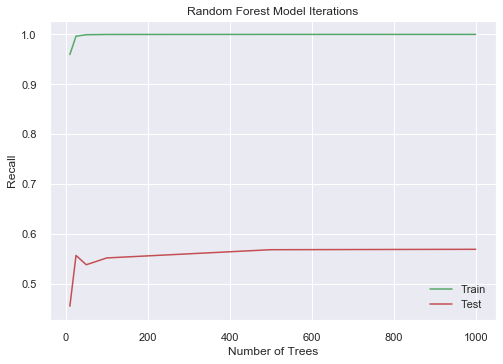

In [97]:
plt.plot(max_n, train_rec_results, 'g', label="Train")
plt.plot(max_n, rec_results, 'r', label="Test")

plt.legend()

plt.ylabel("Recall")
plt.xlabel("Number of Trees")
plt.title('Random Forest Model Iterations')
plt.show()

In [100]:
# We will try iterating over max amount of features used
max_features = np.ceil(np.linspace(1, 73, 10, endpoint=True)).astype(int)

acc_results=[]
prec_results=[]
rec_results=[]
ll_results=[]

train_acc_results=[]
train_prec_results=[]
train_rec_results=[]
train_ll_results=[]

for max_feat in max_features:
    rf = RandomForestClassifier(n_estimators = 100, max_features=max_feat,
                                criterion='gini',
                                random_state = 42,
                                max_depth=36)
    rf.fit(X_train_scaled, Y_train)
    
    train_yhat = rf.predict(X_train_scaled)
    train_class_prob = rf.predict_proba(X_train_scaled)
    
    yhat = rf.predict(X_test_scaled)
    class_probabilities = rf.predict_proba(X_test_scaled)
    
    train_acc = mt.accuracy_score(Y_train, train_yhat)
    train_prec = mt.precision_score(Y_train, train_yhat)
    train_rec = mt.recall_score(Y_train, train_yhat)
    train_ll = multiclass_log_loss(Y_train, train_class_prob)
    
    acc = mt.accuracy_score(Y_test, yhat)
    prec = mt.precision_score(Y_test, yhat)
    rec = mt.recall_score(Y_test, yhat)
    ll = multiclass_log_loss(Y_test, class_probabilities)
#     depth=rf.get_depth()
    
    train_acc_results.append(train_acc)
    train_prec_results.append(train_prec)
    train_rec_results.append(train_rec)
    train_ll_results.append(train_ll)
    
    acc_results.append(acc)
    prec_results.append(prec)
    rec_results.append(rec)
    ll_results.append(ll)
#     depth_results.append(depth)
    
    print ('Max features:', max_feat)
    print ('TRAIN')
    print (' Accuracy:', train_acc)
    print (' Precision:', train_prec)
    print (' Recall:', train_rec)
    print (' Log Loss:', train_ll)
    print ('VALIDATION')
    print (' Accuracy:', acc)
    print (' Precision:', prec)
    print (' Recall:', rec)
    print (' Log Loss:', ll)
    print ("---")
    

Max features: 1
TRAIN
 Accuracy: 0.9896696234391418
 Precision: 0.9998473437818034
 Recall: 0.9588853915037943
 Log Loss: 0.16600743069988175
VALIDATION
 Accuracy: 0.796300368985656
 Precision: 0.62883046237534
 Recall: 0.35543712206620887
 Log Loss: 0.44319277657546846
---
Max features: 9
TRAIN
 Accuracy: 0.9992791339833346
 Precision: 0.999804310070693
 Recall: 0.997315960276212
 Log Loss: 0.10786561694185073
VALIDATION
 Accuracy: 0.8449771522126921
 Precision: 0.7163138547344403
 Recall: 0.5791739264118069
 Log Loss: 0.38220528631710393
---
Max features: 17
TRAIN
 Accuracy: 0.9998594922170906
 Precision: 0.9998047637641546
 Recall: 0.9996339945831199
 Log Loss: 0.07908580548362415
VALIDATION
 Accuracy: 0.8750335996872175
 Precision: 0.7533006001091107
 Recall: 0.7075945475043558
 Log Loss: 0.33425788659328903
---
Max features: 25
TRAIN
 Accuracy: 0.9998717102851697
 Precision: 0.9997803806734993
 Recall: 0.9997071956664959
 Log Loss: 0.0646536785932073
VALIDATION
 Accuracy: 0.889157

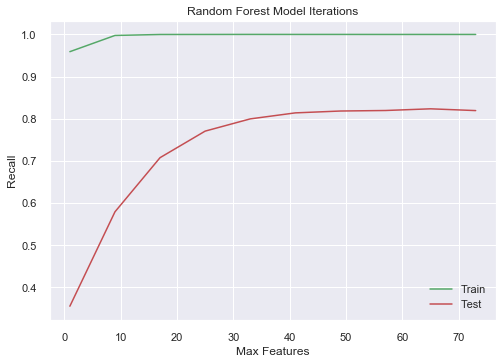

In [101]:
plt.plot(max_features, train_rec_results, 'g', label="Train")
plt.plot(max_features, rec_results, 'r', label="Test")

plt.legend()

plt.ylabel("Recall")
plt.xlabel("Max Features")
plt.title('Random Forest Model Iterations')
plt.show()

In [102]:
# max_depths = np.linspace(1, 74, 74, endpoint=True)
max_depths = np.arange(2,50,step=6)

acc_results=[]
prec_results=[]
rec_results=[]
ll_results=[]

train_acc_results=[]
train_prec_results=[]
train_rec_results=[]
train_ll_results=[]

for max_depth in max_depths:
    rf = RandomForestClassifier(n_estimators = 100,max_features=41,
                                criterion='gini',
                                random_state = 42,
                                max_depth=max_depth)
    rf.fit(X_train_scaled, Y_train)
    
    train_yhat = rf.predict(X_train_scaled)
    train_class_prob = rf.predict_proba(X_train_scaled)
    
    yhat = rf.predict(X_test_scaled)
    class_probabilities = rf.predict_proba(X_test_scaled)
    
    train_acc = mt.accuracy_score(Y_train, train_yhat)
    train_prec = mt.precision_score(Y_train, train_yhat)
    train_rec = mt.recall_score(Y_train, train_yhat)
    train_ll = multiclass_log_loss(Y_train, train_class_prob)
    
    acc = mt.accuracy_score(Y_test, yhat)
    prec = mt.precision_score(Y_test, yhat)
    rec = mt.recall_score(Y_test, yhat)
    ll = multiclass_log_loss(Y_test, class_probabilities)
#     depth=rf.get_depth()
    
    train_acc_results.append(train_acc)
    train_prec_results.append(train_prec)
    train_rec_results.append(train_rec)
    train_ll_results.append(train_ll)
    
    acc_results.append(acc)
    prec_results.append(prec)
    rec_results.append(rec)
    ll_results.append(ll)
#     depth_results.append(depth)
    
    
    print ('Max depth:', max_depth)
    print ('TRAIN')
    print (' Accuracy:', train_acc)
    print (' Precision:', train_prec)
    print (' Recall:', train_rec)
    print (' Log Loss:', train_ll)
    print ('VALIDATION')
    print (' Accuracy:', acc)
    print (' Precision:', prec)
    print (' Recall:', rec)
    print (' Log Loss:', ll)
    print ("---")

Max depth: 2
TRAIN
 Accuracy: 0.7496334579576277
 Precision: 0.0
 Recall: 0.0
 Log Loss: 0.49356753133073544
VALIDATION
 Accuracy: 0.7615766195049238
 Precision: 0.0
 Recall: 0.0
 Log Loss: 0.47688591811075814
---
Max depth: 8
TRAIN
 Accuracy: 0.8311829533514161
 Precision: 0.7489277589229105
 Recall: 0.48998365175804603
 Log Loss: 0.3833415608749389
VALIDATION
 Accuracy: 0.8393079686240011
 Precision: 0.7188661070593092
 Recall: 0.5354104745311059
 Log Loss: 0.3897106294669422
---
Max depth: 14
TRAIN
 Accuracy: 0.9162268162158199
 Precision: 0.8744233304042179
 Recall: 0.7769806993143499
 Log Loss: 0.23061273783334416
VALIDATION
 Accuracy: 0.8786745839747819
 Precision: 0.7530629488804393
 Recall: 0.730757404940043
 Log Loss: 0.30241616134479377
---
Max depth: 20
TRAIN
 Accuracy: 0.9737311536299881
 Precision: 0.9545488339818097
 Recall: 0.9398287094649
 Log Loss: 0.11057591903712635
VALIDATION
 Accuracy: 0.8929941597634582
 Precision: 0.7612708900116596
 Recall: 0.8030132212770319
 L

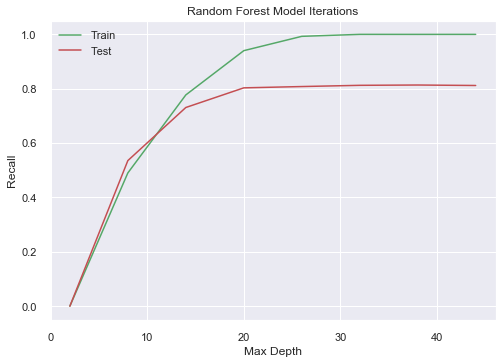

In [103]:
plt.plot(max_depths, train_rec_results, 'g', label="Train")
plt.plot(max_depths, rec_results, 'r', label="Test")

plt.legend()

plt.ylabel("Recall")
plt.xlabel("Max Depth")
plt.title('Random Forest Model Iterations')
plt.show()

### Random Forest Evaluation
On the test set set aside before modeling began, we got an accuracy of 88.1% and a recall of 69.3%. In other words, this model correctly predicts 69.3% of high severity accidents. Similar to the Decision Tree model, we are predicting fewer true low severity accidents as high severity accidents (4.8% of all accidents) than we are predicting true high severity accidents as low accidents (7.1% of all accidents). Thus, we still face misclassification and its potential rammifications for resouce allocation. However, this model performs better than the single Decision Tree in all metrics.

### Random Forest Features
As shown in the tables below, many of the most important predictors in the model have to do with the location of the accident. The importance of features in sklearn's RandomForestClassifier do not specify how they are measured. However, larger numbers equate to more important features.

Similar to the Decision Tree model, we see the Random Forest model important features include latitude, longitude, and accident location characteristics like side and traffic signal. However, we see more features in the top 10 that are related to weather. Exploring why these features are now appearing as important, and how we can highlight their importance for rainy days or icy roads, will be a next step in our process.

In [104]:
# Instantiate model with n decision trees
rf = RandomForestClassifier(n_estimators = 100,max_features=41, random_state = 42, max_depth=20)

In [106]:
%%time

rf.fit(X_train_scaled, Y_train)
rf_yhat = rf.predict(X_test_fin_scaled)
rf_class_probabilities = rf.predict_proba(X_test_fin_scaled)


Wall time: 1min 49s


In [107]:
print ('Accuracy:', mt.accuracy_score(Y_test_fin, rf_yhat))
print ('Precision:', mt.precision_score(Y_test_fin, rf_yhat))
print ('Recall:', mt.recall_score(Y_test_fin, rf_yhat))
print ('Log Loss:', multiclass_log_loss(Y_test_fin, rf_class_probabilities))
# print ('Tree depth:', rf.get_depth())
print ('Number of features:', rf.n_features_)

Accuracy: 0.8811110651157015
Precision: 0.770547263681592
Recall: 0.6925415846896799
Log Loss: 0.3036237805977501
Number of features: 73


In [110]:
imp_dictionary = {"Features":df_X_train.columns,"Importance":rf.feature_importances_}
important_features_dt=pd.DataFrame.from_dict(imp_dictionary).sort_values("Importance",ascending=False)
important_features_dt.head(10)

,Features,Importance
0,Start_Lat,0.327002
1,Start_Lng,0.272306
21,Traffic_Signal,0.063111
24,Time_Duration(min),0.040381
27,Side_R,0.038409
26,Side_L,0.029315
23,Start_Hour,0.023105
6,Pressure(in),0.022795
5,Humidity(%),0.021772
3,Temperature(F),0.021607


In [108]:
mt.confusion_matrix(Y_test_fin,rf_yhat)


array([[34826,  2306],
       [ 3438,  7744]], dtype=int64)

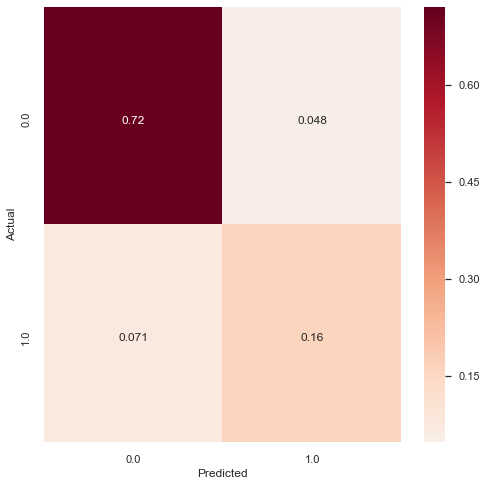

In [109]:
fig1, ax1 = plt.subplots(figsize=(8, 8))

rf_confusion_matrix = pd.crosstab(Y_test_fin, rf_yhat, rownames=['Actual'], colnames=['Predicted'], normalize='all')


annot_kws1 = {"ha": 'center',"va": 'top'}
ax1 = sns.heatmap(rf_confusion_matrix, annot=True, annot_kws=annot_kws1, cmap ='RdBu_r', center=0)